Robot: (138, 109) Package: (16, 150)
Path found with total cost: 205.5


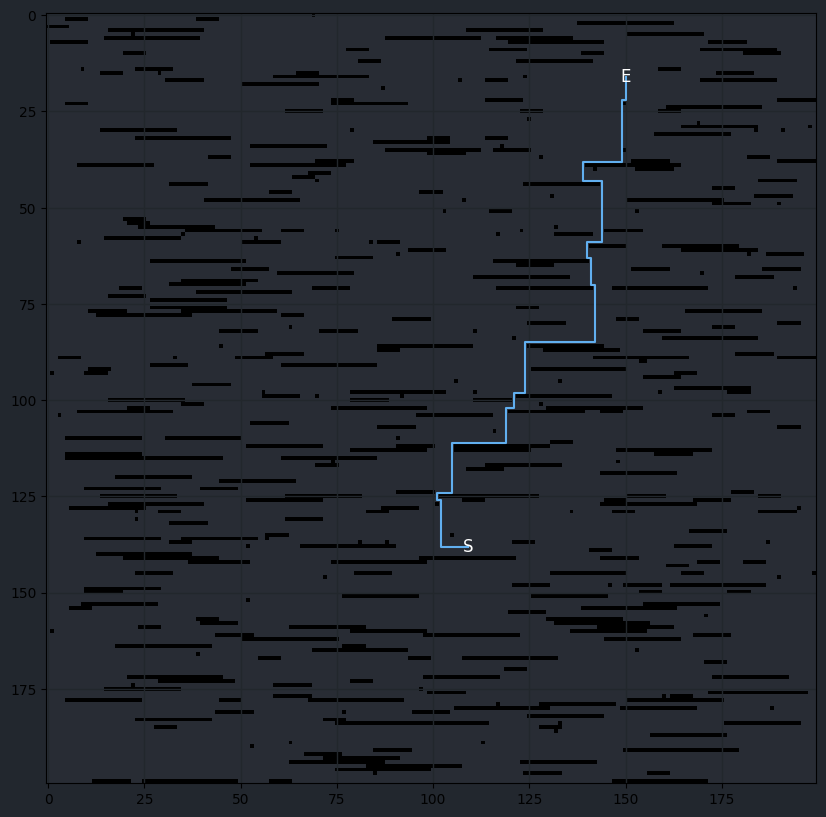

In [1]:
import collections
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time

DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def create_warehouse(rows, cols, obstacle_count):
    warehouse = [[0 for _ in range(cols)] for _ in range(rows)]

    def is_space_free(row, col, size):
        if col + size > cols:
            return False
        for i in range(size):
            if warehouse[row][col + i] != 0:
                return False
        return True

    def place_obstacle(row, col, size):
        for i in range(size):
            warehouse[row][col + i] = -1
            
    obstacle_sizes = [1, int(rows/8.0), int(rows/10.0), int(rows/20.0), int(rows/30.0)]

    for _ in range(obstacle_count):
        obstacle_placed = False
        while not obstacle_placed:
            r, c = random.randint(0, rows - 1), random.randint(0, cols - 1)
            size = random.choice(obstacle_sizes)

            if is_space_free(r, c, size):
                place_obstacle(r, c, size)
                obstacle_placed = True

    return warehouse

def position_robot_and_package(warehouse):
    rows, cols = len(warehouse), len(warehouse[0])
    while True:
        r_r, r_c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        p_r, p_c = random.randint(0, rows - 1), random.randint(0, cols - 1)
        if warehouse[r_r][r_c] == 0 and warehouse[p_r][p_c] == 0:
            return (r_r, r_c), (p_r, p_c)

def calculate_cost(current_dir, new_dir):
    # If the move is straight or backward, the cost is 1
    # For turns, the cost is 1.5
    if current_dir == new_dir or (current_dir[0] == -new_dir[0] and current_dir[1] == -new_dir[1]):
        return 1
    else:
        return 1.5

def bfs(warehouse, start, goal):
    rows, cols = len(warehouse), len(warehouse[0])
    queue = collections.deque([(start, (0, 1), 0, [])])  # (position, direction, cost, path)
    visited = set()
    visited.add((start, (0, 1)))  # Mark visited by position and initial direction

    while queue:
        (r, c), direction, cost, path = queue.popleft()

        if (r, c) == goal:
            return path + [(r, c)], cost  # Return path and total cost

        for i in range(4):  # Iterate through directions
            new_dir = DIRECTIONS[i]
            next_r, next_c = r + new_dir[0], c + new_dir[1]
            if 0 <= next_r < rows and 0 <= next_c < cols and ((next_r, next_c), new_dir) not in visited:
                if warehouse[next_r][next_c] != -1:  # Check if it's not an obstacle
                    new_cost = cost + calculate_cost(direction, new_dir)
                    queue.append(((next_r, next_c), new_dir, new_cost, path + [(r, c)]))
                    visited.add(((next_r, next_c), new_dir))

    return None, 0  # No path found if reached here

# Utility function to print the warehouse
def print_warehouse(warehouse, path=None):
    for r in range(len(warehouse)):
        for c in range(len(warehouse[r])):
            if path and (r, c) in path:
                print("x", end=" ")
            elif warehouse[r][c] == -1:
                print("o", end=" ")
            else:
                print(".", end=" ")
        print()
        
def visualize_warehouse(warehouse, path=None):

    fig, ax = plt.subplots(figsize=(10, 10))
    
    fig.patch.set_facecolor('#22272e')
    ax.set_facecolor('#22272e')

    # Convert the warehouse matrix into a numpy array
    warehouse_np = np.array(warehouse)
    
    cmap = mcolors.ListedColormap(['#000000', '#282c34'])
    ax.imshow(warehouse_np, cmap=cmap, aspect="equal")

    if path:
        # Unzip the path into x and y coordinates
        ys, xs = zip(*path)
        # A scatter plot for visualiation
        ax.plot(xs, ys, '-', color="#61afef", markersize=1)

        # Start point
        ax.text(xs[0], ys[0], 'S', ha='center', va='center', color='white', fontsize=12)
        # End point
        ax.text(xs[-1], ys[-1], 'E', ha='center', va='center', color='white', fontsize=12)

    ax.grid(which='both', color='#22272c', linestyle='-', linewidth=1)

    plt.show()


def main():
    rows, cols, obstacles = 200, 200, 400  # Define warehouse dimensions and obstacle count
    warehouse = create_warehouse(rows, cols, obstacles)
    robot_pos, package_pos = position_robot_and_package(warehouse)
    
    print("Robot:", robot_pos, "Package:", package_pos)
    
    path, cost = bfs(warehouse, robot_pos, package_pos)
    if path:
        print("Path found with total cost:", cost)
        visualize_warehouse(warehouse, path=path)
    else:
        main()

main()

Robot: (263, 107) Package: (321, 319)
Path found with total cost: 344.0


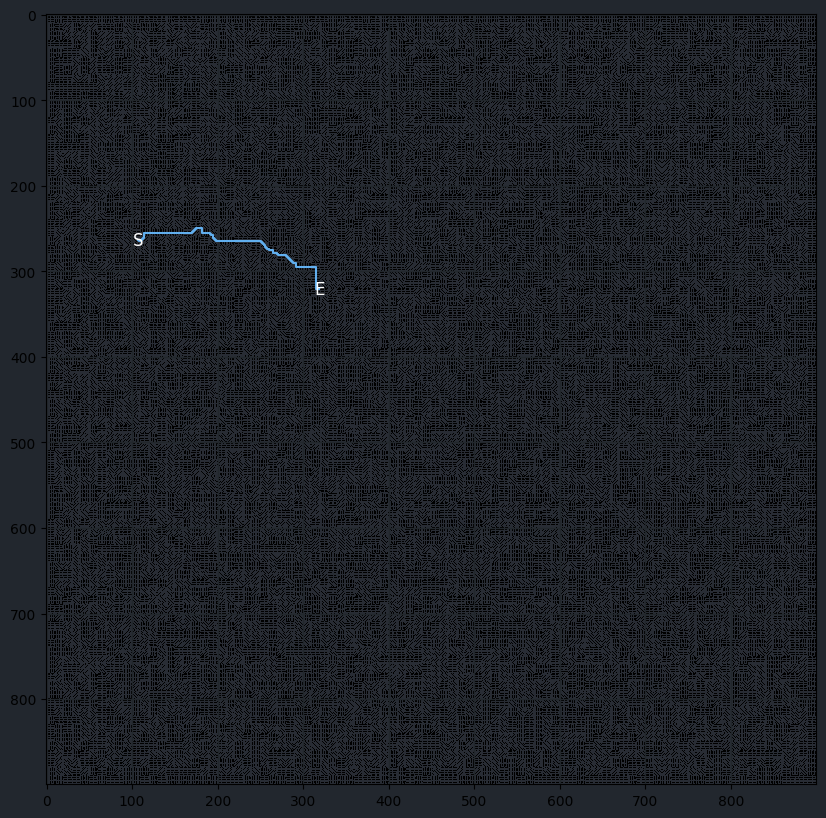

In [2]:
DIRECTIONS = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])  # Converted to numpy array

def create_warehouse(rows, cols, obstacle_count):
    warehouse = np.zeros((rows, cols), dtype=int)

    # Identify all available positions for obstacles
    free_spaces = np.column_stack(np.where(warehouse == 0))

    # Randomly choose positions for obstacles
    for _ in range(min(obstacle_count, free_spaces.shape[0])):
        idx = random.randrange(free_spaces.shape[0])
        r, c = free_spaces[idx]
        warehouse[r, c] = -1  # Place obstacle
        free_spaces = np.delete(free_spaces, idx, 0)  # Remove the occupied position

    return warehouse

def create_warehouse_with_pattern(rows, cols):
    patterns = [
        -1 * np.array([
            [0,0,0,1,0,0,1,0,0,0],
            [0,1,0,0,1,0,0,1,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,0,0,1,0,0,1,0,0,1],
            [0,1,0,0,1,0,0,1,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,0,0,1,0,0,1,0,0,1],
            [0,1,0,0,1,0,0,1,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,0,0,1,0,0,1,0,0,1]
        ]),
        -1 * np.array([
            [0,0,0,1,0,0,1,0,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,1,0,0,1,0,0,1,0,0],
            [1,0,0,1,0,0,1,0,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,1,0,0,1,0,0,1,0,0],
            [1,0,0,1,0,0,1,0,0,0],
            [0,0,1,0,0,1,0,0,1,0],
            [0,1,0,0,1,0,0,1,0,0],
            [1,0,0,1,0,0,1,0,0,0]
        ]),
         -1 * np.array([
            [0,0,0,1,0,0,0,1,0,0],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,1,0,1,0,1,0,1],
            [0,0,0,0,0,0,0,0,0,0],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,1,0,1,0,1,0,1],
            [0,1,0,0,0,1,0,0,0,1]
        ]),
        -1 * np.array([
            [0,1,1,1,1,0,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0],
            [1,1,1,1,1,0,1,1,1,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,1,1,1,1,0,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0],
            [1,1,1,1,1,0,1,1,1,0],
            [0,0,0,0,0,0,0,0,0,0],
            [0,1,1,1,1,0,1,1,1,1],
            [0,0,0,0,0,0,0,0,0,0]
        ]),
    ]

    warehouse = np.zeros((rows, cols), dtype=int)

    def is_edge(i, j, rows, cols):
        return i == 0 or j == 0 or i + 10 == rows or j + 10 == cols

    for i in range(0, rows, 10):
        for j in range(0, cols, 10):
            # Choose a pattern. At the edge, first 2 patterns are avoided
            # to ensure paths are not blocked
            if is_edge(i, j, rows, cols):
                selected_pattern = random.choice(patterns[2:])
            else:
                selected_pattern = random.choice(patterns)

            # Ensure we don't go out of bounds
            end_i = min(i+10, rows)
            end_j = min(j+10, cols)

            warehouse[i:end_i, j:end_j] = selected_pattern[:end_i-i, :end_j-j]

    return warehouse


def position_robot_and_package(warehouse):
    free_spaces = np.column_stack(np.where(warehouse == 0))
    robot_pos_idx, package_pos_idx = random.sample(range(free_spaces.shape[0]), 2)
    robot_pos = tuple(free_spaces[robot_pos_idx])
    package_pos = tuple(free_spaces[package_pos_idx])

    return robot_pos, package_pos

def calculate_cost(current_dir, new_dir):
    """ """
    
    if np.all(current_dir == new_dir):
        return 1.0
    elif np.all(current_dir == -new_dir):
        return 3.0
    else:
        return 1.5


def bfs(warehouse, start, goal):
    rows, cols = warehouse.shape
    queue = collections.deque([(start, (0, 1), 0, [])])
    visited = set()
    visited.add((start, (0, 1)))

    while queue:
        (r, c), direction, cost, path = queue.popleft()

        if (r, c) == goal:
            return path + [(r, c)], cost

        for new_dir in DIRECTIONS:
            next_r, next_c = np.array([r, c]) + new_dir
            if 0 <= next_r < rows and 0 <= next_c < cols and warehouse[next_r, next_c] != -1:
                new_dir_tuple = tuple(new_dir)
                if ((next_r, next_c), new_dir_tuple) not in visited:
                    new_cost = cost + calculate_cost(direction, new_dir)
                    queue.append(((next_r, next_c), new_dir_tuple, new_cost, path + [(r, c)]))
                    visited.add(((next_r, next_c), new_dir_tuple))

    return None, 0


def main():
    rows, cols, obstacles = 900, 900, 0  # Define warehouse dimensions and obstacle count
    
    # warehouse = create_random_patterns_warehouse(rows, cols)
    # warehouse = create_warehouse(rows, cols, obstacles)
    warehouse = create_warehouse_with_pattern(rows,cols)
    robot_pos, package_pos = position_robot_and_package(warehouse)
    
    print("Robot:", robot_pos, "Package:", package_pos)
    
    path, cost = bfs(warehouse, robot_pos, package_pos)
    if path:
        print("Path found with total cost:", cost)
        visualize_warehouse(warehouse, path=path)
    else:
        main()
        # print("No path found!")
        # visualize_warehouse(warehouse)

# Run the main function
main()

In [7]:
import heapq  # A* uses a priority queue

def heuristic(a, b):
    # Manhattan distance on a square grid
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(warehouse, start, goal):
    rows, cols = warehouse.shape
    queue = []
    while queue:
        _, cost, (r, c), direction, path = heapq.heappop(queue)

        if (r, c) == goal:
            return path + [(r, c)], cost

        for new_dir in DIRECTIONS:
            next_r, next_c = np.array([r, c]) + new_dir
            if 0 <= next_r < rows and 0 <= next_c < cols and warehouse[next_r, next_c] != -1:
                new_cost = cost + calculate_cost(direction[-1], new_dir)
                new_position = (next_r, next_c)
                if new_position not in visited:
                    heapq.heappush(queue, (new_cost + heuristic(new_position, goal), new_cost, new_position, direction + [new_dir], path + [(r, c)]))
                    visited.add(new_position)

    return None, 0

Robot: (65, 10) Package: (60, 24)
Path found with cost: 19.5
Search time: 0.0014729499816894531
Total time: 19.50147294998169


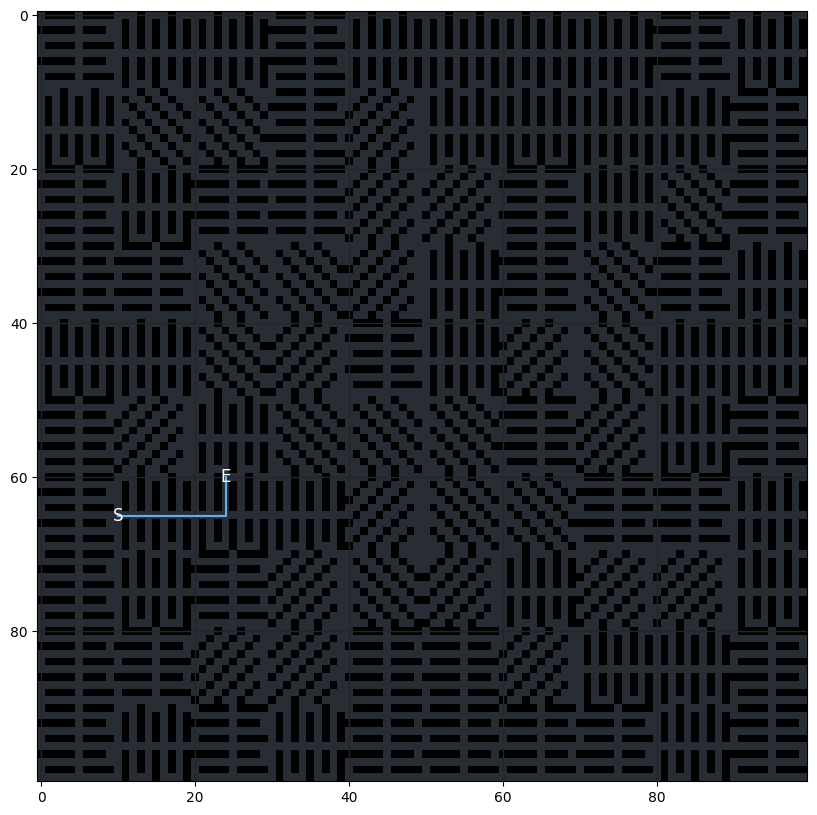

In [71]:
def run():
    rows, cols = 100, 100
    
    warehouse = create_warehouse_with_pattern(rows,cols)
    robot_pos, package_pos = position_robot_and_package(warehouse)
    
    print("Robot:", robot_pos, "Package:", package_pos)
    
    start_time = time.time()
    path, cost = a_star(warehouse, robot_pos, package_pos)
    # path, cost = bfs(warehouse, robot_pos, package_pos)
    end_time = time.time()
    c_time = end_time - start_time
    
    if path:
        print("Path found with cost:", cost)
        print("Search time:", c_time)
        print("Total time:", cost + c_time)
        visualize_warehouse(warehouse, path=path)
    else:
        run()

run()